# higher number of distinct emails with same DOB is indicative of lower fraud occurence

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pointbiserialr


# Read the CSV file into a DataFrame
df = pd.read_csv('undersampled_data.csv')

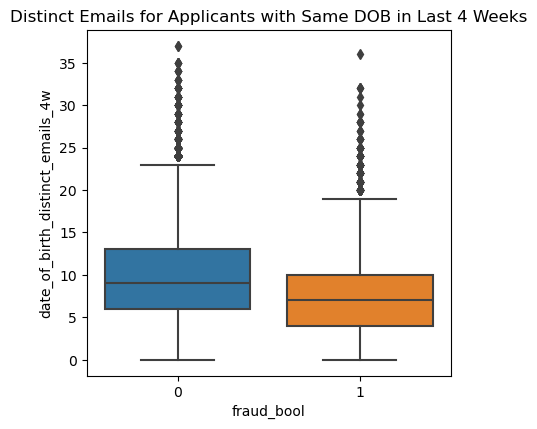

Column: date_of_birth_distinct_emails_4w
T-Statistic: -40.142961424035086
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in date_of_birth_distinct_emails_4w between fraud and legitimate cases.




In [26]:
# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(12, 8))


# Email History
plt.subplot(2, 3, 4)
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=df)
plt.title('Distinct Emails for Applicants with Same DOB in Last 4 Weeks')



plt.tight_layout()
plt.show()

# Statistical Testing
columns_of_interest = ['date_of_birth_distinct_emails_4w']
for column in columns_of_interest:
    t_stat, p_value = ttest_ind(fraudulent_accounts[column].dropna(), 
                                legitimate_accounts[column].dropna())
    print(f"Column: {column}")
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in", column, "between fraud and legitimate cases.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in", column, "between fraud and legitimate cases.")
    print("\n")

In [28]:
# small p-value indicate a significant difference in date_of_birth_distinct_emails_4w between fraud and legit cases.
# possibly suggest that fraud accounts tend to have a significantly lower number of distinct emails for applicants with the same date of birth in the last 4 weeks compared to legit accounts

# fraudsters may attempt to use the same date of birth across multiple fraud applications (using bots to spam apply), resulting in a lower number of distinct emails associated with that date of birth.

# this supports the hypothesis that certain applicant history features, such as the number of distinct emails associated with the same date of birth are correlated with fraud behavior
# banks can leverage these insights to enhance their fraud detection and prevention strategies
# For example, they can use the number of distinct emails associated with the same date of birth as a red flag for potential fraudulent activity

In [29]:
# test for normality of predictive features

# Shapiro-Wilk test for date_of_birth_distinct_emails_4w of fraudulent accounts


# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

shapiro_stat_fraud, p_value_fraud = shapiro(fraudulent_accounts['date_of_birth_distinct_emails_4w'].dropna())
print("Shapiro-Wilk test for date_of_birth_distinct_emails_4w of fraudulent accounts:")
print("Statistic:", shapiro_stat_fraud)
print("P-Value:", p_value_fraud)

# Shapiro-Wilk test for session length of legitimate accounts
shapiro_stat_legit, p_value_legit = shapiro(legitimate_accounts['date_of_birth_distinct_emails_4w'].dropna())
print("\nShapiro-Wilk test for date_of_birth_distinct_emails_4w of legitimate accounts:")
print("Statistic:", shapiro_stat_legit)
print("P-Value:", p_value_legit)

Shapiro-Wilk test for date_of_birth_distinct_emails_4w of fraudulent accounts:
Statistic: 0.9340893030166626
P-Value: 0.0

Shapiro-Wilk test for date_of_birth_distinct_emails_4w of legitimate accounts:
Statistic: 0.9631298780441284
P-Value: 0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [5]:
# things to note:
# Shapiro-Wilk test may not be accurate since sample size is > 5000

# suppose choose significance level = 0.05 
# p value for both fraud and legit cases are very small, less than significance level
# cannot assume distribution of 'date_of_birth_distinct_emails_4w' for both cases is normal - so using t-test is not accurate


# # alternative is use feature engineering
# create categorical bins using 'date_of_birth_distinct_emails_4w'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous date_of_birth_distinct_emails_4w feature into a categorical feature

In [6]:
date_of_birth_distinct_emails_4w = df['date_of_birth_distinct_emails_4w']
fraud = df['fraud_bool']

# Calculate point biserial correlation coefficient and its p-value
correlation_coefficient, p_value = pointbiserialr(date_of_birth_distinct_emails_4w, fraud)

print("Point Biserial Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)


Point Biserial Correlation Coefficient: -0.15441947016504962
p-value: 0.0


In [30]:
# correlation coefficient suggests a negative correlation between date_of_birth_distinct_emails_4w and the likelihood of fraud
# negative value indicates as date_of_birth_distinct_emails_4w increases, there is tendency for fraud to be less likely

# p value extremely small indicating strong evidence against the null hypothesis that there is no correlation between date_of_birth_distinct_emails_4w and fraud

# results suggests that date_of_birth_distinct_emails_4w may have some influence on fraud activities

# use feature engineering, implement new column 'emails_bin' to test the association with fraud occurences

In [31]:
# # alternative is use feature engineering
# create categorical bins using 'date_of_birth_distinct_emails_4w'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous date_of_birth_distinct_emails_4w feature into a categorical feature

/tmp/ipykernel_54133/3430037724.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby('emails_bin')['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


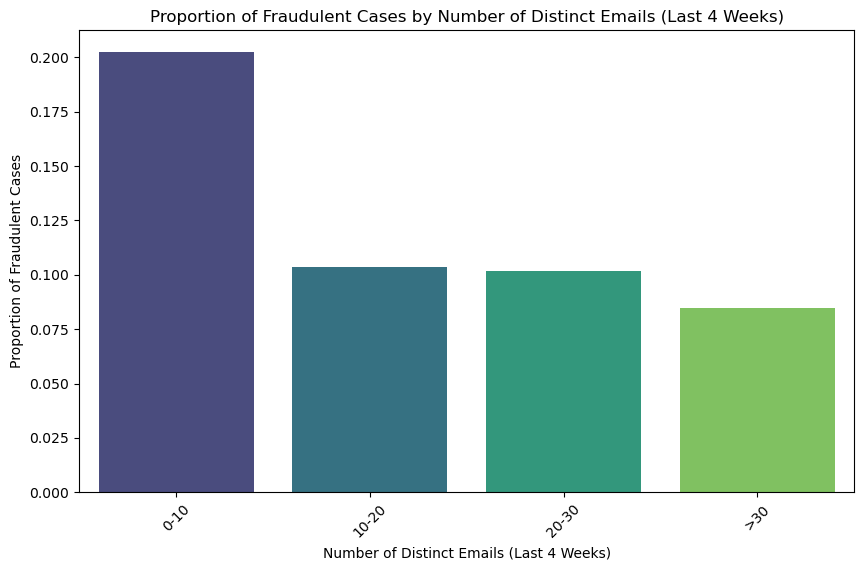

In [32]:
# Define the bin edges and labels for categorical binning
bin_edges = [0, 10, 20, 30, 50]  # Define your own bin edges as needed
bin_labels = ['0-10', '10-20', '20-30', '>30']  # Define corresponding labels

# Perform categorical binning
df['emails_bin'] = pd.cut(df['date_of_birth_distinct_emails_4w'], bins=bin_edges, labels=bin_labels)

# Assuming df contains the dataset with columns 'emails_bin' and 'fraud_bool'

# Calculate the proportion of fraudulent cases for each bin
fraud_proportion_by_bin = df.groupby('emails_bin')['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases
plt.figure(figsize=(10, 6))
sns.barplot(x='emails_bin', y='fraud_bool', data=fraud_proportion_by_bin, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks)')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()

In [33]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['emails_bin'], df['fraud_bool'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'emails_bin' and fraud occurrence.")

Chi-square Statistic: 1079.3991714408298
P-Value: 1.0724595689459299e-233
Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.


In [12]:
# suggests a substantial degree of association between the number of distinct emails (email bins) and fraud occurrence
# can conclude the association between the 2 features
# supports the pattern of higher number of distinct emails indicates lower fraud occurence

In [35]:
# statistical testing 
# Point-biserial correlation
corr_coeff, p_val = pointbiserialr(df['emails_bin'].cat.codes, df['fraud_bool'])

print("Point-Biserial Correlation Coefficient:", corr_coeff)
print("P-Value:", p_val)

alpha = 0.05
if p_val < alpha:
    if corr_coeff > 0:
        print("Positive association: Larger number of distinct emails with same DOB are associated with a higher proportion of fraudulent cases.")
    else:
        print("Negative association: Larger number of distinct emails with same DOB are associated with a lower proportion of fraudulent cases.")
else:
    print("No significant association found.")

Point-Biserial Correlation Coefficient: -0.12557690521021964
P-Value: 4.983946371574569e-230
Negative association: Larger number of distinct emails with same DOB are associated with a lower proportion of fraudulent cases.


In [36]:
# supports the hypothesis that the smaller number of distinct emails with same DOB indicative of higher fraud occurences

In [11]:

# Fit ANOVA model
model = ols('fraud_bool ~ emails_bin', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq       df           F         PR(>F)
emails_bin   149.480698      3.0  365.775857  1.263874e-235
Residual    8966.300753  65821.0         NaN            NaN


In [34]:
# 'fraud_bool' is the outcome variable and 'emails_bin' is the predictor variable.
# specify typ=2 for Type 2 ANOVA, suitable for unbalanced designs.

# small p value indicates that number of distinct emails is associated with the different fraud occurrence. 

# can conclude fraud accounts highly likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks


# test the effectiveness of using date_of_birth_distinct_emails_4w and credit_risk_score as important predictor for fraud detection and prevention strategies

/tmp/ipykernel_54133/3900524074.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin_and_score = df.groupby(['emails_bin', 'credit_risk_score_bin'])['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


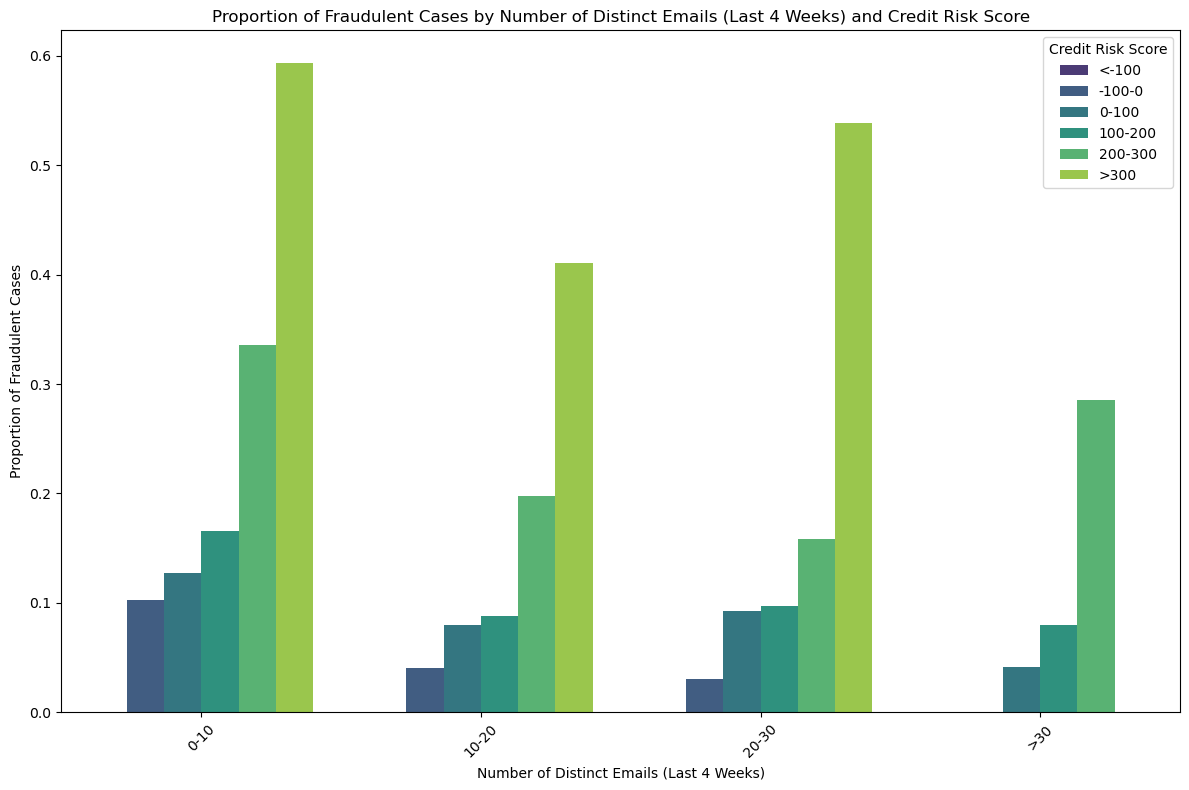

In [37]:
# Define custom bin edges and labels for 'credit_risk_score'
credit_score_bin_edges = [-176, -100, 0, 100, 200, 300, 400] # Define your own custom bin edges
credit_score_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']  # Define corresponding labels

# Perform categorical binning for 'credit_risk_score'
df['credit_risk_score_bin'] = pd.cut(df['credit_risk_score'], bins=credit_score_bin_edges, labels=credit_score_bin_labels)

# Group data by 'emails_bin' and 'credit_risk_score_bin' and calculate the mean of 'fraud_bool'
fraud_proportion_by_bin_and_score = df.groupby(['emails_bin', 'credit_risk_score_bin'])['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='emails_bin', y='fraud_bool', hue='credit_risk_score_bin', data=fraud_proportion_by_bin_and_score, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks) and Credit Risk Score')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# Group data by 'emails_bin'
grouped_data = df.groupby('emails_bin')

# Perform chi-square test for each group
for name, group in grouped_data:
    contingency_table = pd.crosstab(group['credit_risk_score_bin'], group['fraud_bool'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square Statistic for {name}: {chi2}")
    print(f"P-Value for {name}: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.")
    else:
        print("Fail to reject the null hypothesis.")
    print()

Chi-square Statistic for 0-10: 2669.050412060975
P-Value for 0-10: 0.0
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 10-20: 654.3239136132352
P-Value for 10-20: 3.680146693213178e-139
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 20-30: 34.29470304548683
P-Value for 20-30: 6.483553610075097e-07
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for >30: 4.504238977072311
P-Value for >30: 0.34204514269936015
Fail to reject the null hypothesis.



/tmp/ipykernel_54133/3068512564.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('emails_bin')


In [38]:
# for the bins : 0-10, 10-20, 20-30, 
# significant association between email_bins,credit_risk_score and fraud occurence 

# consistent results that suggest that fraud accounts likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks

# consistent results of higher credit_risk_score lead to higher fraud rates

# possible reasons to explain this pattern

In [15]:
# 1. Fraudsters would choose to rely on anonymity to conceal their identity and evade detection. So they may attempt to create multiple accounts using different or fabricated identities, hence lower count of distinct emails associated with the same date of birth


# 2. a higher number of emails associated with the same date of birth could suggest a stronger level of identity verification. As legit users may have multiple email addresses associated with their identity for various legitimate reasons, such as personal and professional communication, so higher count of distinct emails linked to the same date of birth may suggest a more established and verified identity, hence less fraud occurrence


In [19]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,emails_bin,credit_risk_score_bin
0,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,1500.0,0,INTERNET,4.036394,windows,1,1,0,10-20,100-200
1,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,1500.0,0,INTERNET,12.928072,windows,0,1,0,0-10,0-100
2,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,1500.0,0,INTERNET,2.550167,linux,0,1,0,0-10,100-200
3,1,0.7,0.090000,-1,58,50,0.004134,-1.000000,AD,4011,...,1500.0,0,INTERNET,3.500856,windows,0,1,0,0-10,100-200
4,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,2000.0,0,INTERNET,44.536211,windows,0,1,0,10-20,200-300
